In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt 
from numpy.polynomial.polynomial import polyfit
from scipy import optimize

In [2]:
with open("airline_delay.csv") as csvfile:
    reader = csv.DictReader(csvfile)
    data = [r for r in reader]

NUM = len(data)

In [3]:
totalyear=17
totalmonth = 12
delay_causes = 7

company_list =[]

airport_list = ['DFW','ORD','JFK','ATL','MIA']
selectcompnay_list = ['AA','UA','DL','WN','AS']
airport_num  = len(airport_list)
selectcompnay_num = len(selectcompnay_list)

for n in range (0,NUM):
  s=data[n]['carrier']
  if not s in company_list:
    company_list.append(s)

#print(company_list)

company_num = len(company_list)

year_plot = np.array(range(2003, 2020))
month_plot = np.array([1,2,3,4,5,6,7,8,9,10,11,12])

delay_year = np.zeros((company_num, totalyear, delay_causes+1))
delay_year_AA = np.zeros((totalyear, delay_causes+1))
delay_year_UA = np.zeros((totalyear, delay_causes+1))

delay_month = np.zeros((airport_num, totalmonth))
delay_month_totfly = np.zeros((airport_num, totalmonth))

delay_month2 = np.zeros((selectcompnay_num, totalmonth))
delay_month2_totfly = np.zeros((selectcompnay_num, totalmonth))

for n in range (0,NUM):
    company_index = company_list.index(data[n]['carrier'])
    year_index = int(data[n]['year'])-2003
    if (data[n]['arr_cancelled']):
        #print "n, year, company index: ", n, year_index, company_index
        delay_year[company_index][year_index][0] += float(data[n]['carrier_ct'])
        delay_year[company_index][year_index][1] += float(data[n]['weather_ct'])
        delay_year[company_index][year_index][2] += float(data[n]['nas_ct'])
        delay_year[company_index][year_index][3] += float(data[n]['security_ct'])
        delay_year[company_index][year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year[company_index][year_index][5] += float(data[n]['arr_cancelled'])
        delay_year[company_index][year_index][6] += float(data[n]['arr_diverted'])
        delay_year[company_index][year_index][7] += float(data[n]['arr_flights'])

    if (data[n]['arr_cancelled'] and data[n]['carrier'] == 'AA'):
        #print("n, year, company: ", n, year_index, data[n]['carrier'])
        delay_year_AA[year_index][0] += float(data[n]['carrier_ct'])
        delay_year_AA[year_index][1] += float(data[n]['weather_ct'])
        delay_year_AA[year_index][2] += float(data[n]['nas_ct'])
        delay_year_AA[year_index][3] += float(data[n]['security_ct'])
        delay_year_AA[year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year_AA[year_index][5] += float(data[n]['arr_cancelled'])
        delay_year_AA[year_index][6] += float(data[n]['arr_diverted'])
        delay_year_AA[year_index][7] += float(data[n]['arr_flights'])

    if (data[n]['arr_cancelled'] and data[n]['carrier'] == 'UA'):
        delay_year_UA[year_index][0] += float(data[n]['carrier_ct'])
        delay_year_UA[year_index][1] += float(data[n]['weather_ct'])
        delay_year_UA[year_index][2] += float(data[n]['nas_ct'])
        delay_year_UA[year_index][3] += float(data[n]['security_ct'])
        delay_year_UA[year_index][4] += float(data[n]['late_aircraft_ct'])
        delay_year_UA[year_index][5] += float(data[n]['arr_cancelled'])
        delay_year_UA[year_index][6] += float(data[n]['arr_diverted'])
        delay_year_UA[year_index][7] += float(data[n]['arr_flights'])


    if data[n]['airport'] in airport_list:
        airport_index = airport_list.index(data[n]['airport'])
        month_index = int(data[n]['month'])-1
        if (data[n]['arr_cancelled']):
            delay_month[airport_index][month_index] += float(data[n]['carrier_ct'])
            delay_month[airport_index][month_index] += float(data[n]['weather_ct'])
            delay_month[airport_index][month_index] += float(data[n]['nas_ct'])
            delay_month[airport_index][month_index] += float(data[n]['security_ct'])
            delay_month[airport_index][month_index] += float(data[n]['late_aircraft_ct'])
            delay_month[airport_index][month_index] += float(data[n]['arr_cancelled'])
            delay_month[airport_index][month_index] += float(data[n]['arr_diverted'])
            delay_month_totfly[airport_index][month_index] += float(data[n]['arr_flights'])

    if data[n]['carrier'] in selectcompnay_list:
        selectcompnay_index = selectcompnay_list.index(data[n]['carrier'])
        month_index = int(data[n]['month'])-1
        if (data[n]['arr_cancelled']):
            delay_month2[selectcompnay_index][month_index] += float(data[n]['carrier_ct'])
            delay_month2[selectcompnay_index][month_index] += float(data[n]['weather_ct'])
            delay_month2[selectcompnay_index][month_index] += float(data[n]['nas_ct'])
            delay_month2[selectcompnay_index][month_index] += float(data[n]['security_ct'])
            delay_month2[selectcompnay_index][month_index] += float(data[n]['late_aircraft_ct'])
            delay_month2[selectcompnay_index][month_index] += float(data[n]['arr_cancelled'])
            delay_month2[selectcompnay_index][month_index] += float(data[n]['arr_diverted'])
            delay_month2_totfly[selectcompnay_index][month_index] += float(data[n]['arr_flights'])

#print(delay_month2)
#print(delay_month2_totfly)

#print(delay_year)

for A in range (0, airport_num):
    #sum_temp = 0  
    for M in range (0,totalmonth):
        delay_month[A][M] = delay_month[A][M]* 100/delay_month_totfly[A][M]

#print(delay_month)


for C in range (selectcompnay_num):
    #sum_temp = 0  
    for M in range (0,totalmonth):
        delay_month2[C][M] = delay_month2[C][M]* 100/delay_month2_totfly[C][M]

#print(delay_month2)


plot2_list = [[] for x in range(delay_causes+1)]
plot_AA_list = [[] for x in range(delay_causes+1)]
plot_UA_list = [[] for x in range(delay_causes+1)]

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        sum_company = 0
        for company in range (0,company_num):
          sum_company += delay_year[company][year][cause]
        plot2_list[cause].append(sum_company)

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        plot_AA_list[cause].append(delay_year_AA[year][cause])

for cause in range (0,delay_causes+1):
    for year in range (0, totalyear):
        plot_UA_list[cause].append(delay_year_UA[year][cause])

#print(plot_AA_list)

for year in range (0,totalyear):
    total_number_oneyear = plot2_list[7][year]
    for cause in range (0,delay_causes):
        plot2_list[cause][year] = plot2_list[cause][year]* 100/total_number_oneyear

for year in range (0,totalyear):
    total_number_oneyear = plot_AA_list[7][year]
    for cause in range (0,delay_causes):
        plot_AA_list[cause][year] = plot_AA_list[cause][year]* 100/total_number_oneyear

for year in range (0,totalyear):
    total_number_oneyear = plot_UA_list[7][year]
    for cause in range (0,delay_causes):
        plot_UA_list[cause][year] = plot_UA_list[cause][year]* 100/total_number_oneyear

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


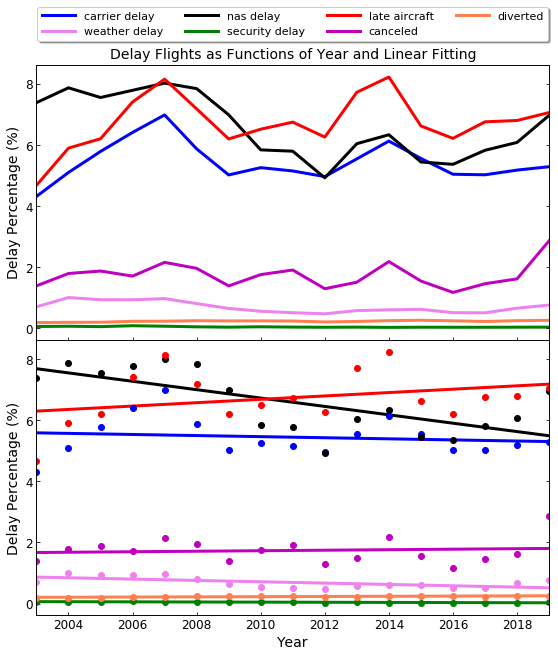

In [4]:
fig1 = plt.figure(figsize=(8,9))

ax1 = fig1.add_subplot(211)

ax1.plot(year_plot,plot2_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot2_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot2_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot2_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot2_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot2_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot2_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('Delay Flights as Functions of Year and Linear Fitting',fontsize=14)


plt.subplots_adjust(hspace=0)


ax2 = fig1.add_subplot(212)


b0, m0 = polyfit(year_plot, plot2_list[0], 1)
b1, m1 = polyfit(year_plot, plot2_list[1], 1)
b2, m2 = polyfit(year_plot, plot2_list[2], 1)
b3, m3 = polyfit(year_plot, plot2_list[3], 1)
b4, m4 = polyfit(year_plot, plot2_list[4], 1)
b5, m5 = polyfit(year_plot, plot2_list[5], 1)
b6, m6 = polyfit(year_plot, plot2_list[6], 1)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot2_list[0],'o',color='b')
ax2.plot(year_plot,plot2_list[1],'o',color='violet')
ax2.plot(year_plot,plot2_list[2],'o',color='black')
ax2.plot(year_plot,plot2_list[3],'o',color='green')
ax2.plot(year_plot,plot2_list[4],'o',color='red')
ax2.plot(year_plot,plot2_list[5],'o',color='m')
ax2.plot(year_plot,plot2_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig1.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

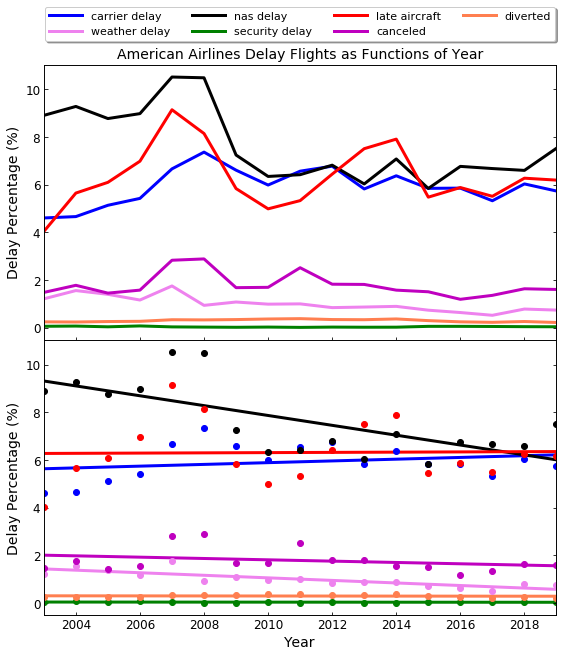

In [5]:
fig11 = plt.figure(figsize=(8,9))

ax1 = fig11.add_subplot(211)

ax1.plot(year_plot,plot_AA_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_AA_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_AA_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_AA_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_AA_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot_AA_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot_AA_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('American Airlines Delay Flights as Functions of Year',fontsize=14)


plt.subplots_adjust(hspace=0)

ax2 = fig11.add_subplot(212)

b0, m0 = polyfit(year_plot, plot_AA_list[0], 1)
b1, m1 = polyfit(year_plot, plot_AA_list[1], 1)
b2, m2 = polyfit(year_plot, plot_AA_list[2], 1)
b3, m3 = polyfit(year_plot, plot_AA_list[3], 1)
b4, m4 = polyfit(year_plot, plot_AA_list[4], 1)
b5, m5 = polyfit(year_plot, plot_AA_list[5], 1)
b6, m6 = polyfit(year_plot, plot_AA_list[6], 1)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot_AA_list[0],'o',color='b')
ax2.plot(year_plot,plot_AA_list[1],'o',color='violet')
ax2.plot(year_plot,plot_AA_list[2],'o',color='black')
ax2.plot(year_plot,plot_AA_list[3],'o',color='green')
ax2.plot(year_plot,plot_AA_list[4],'o',color='red')
ax2.plot(year_plot,plot_AA_list[5],'o',color='m')
ax2.plot(year_plot,plot_AA_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig11.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

plt.savefig('delay_year_AA.pdf', format='pdf')

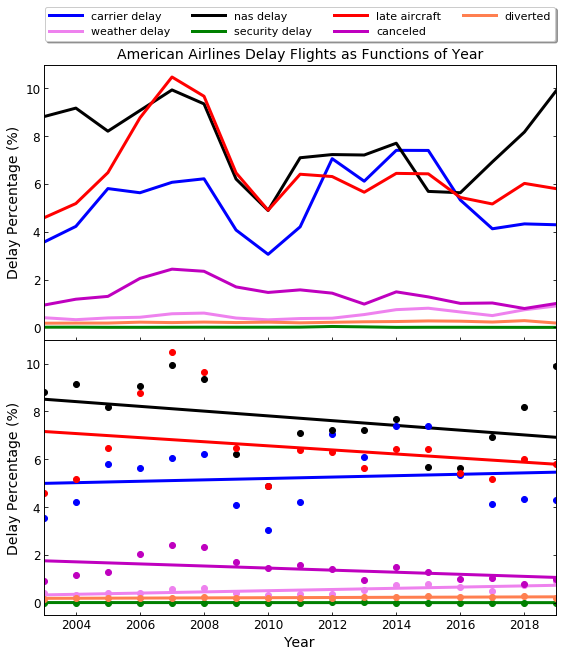

In [6]:
fig12 = plt.figure(figsize=(8,9))

ax1 = fig12.add_subplot(211)

ax1.plot(year_plot,plot_UA_list[0],linewidth=3,color='b')
ax1.plot(year_plot,plot_UA_list[1],linewidth=3,color='violet')
ax1.plot(year_plot,plot_UA_list[2],linewidth=3,color='black')
ax1.plot(year_plot,plot_UA_list[3],linewidth=3,color='green')
ax1.plot(year_plot,plot_UA_list[4],linewidth=3,color='red')
ax1.plot(year_plot,plot_UA_list[5],linewidth=3,color='m')
ax1.plot(year_plot,plot_UA_list[6],linewidth=3,color='coral')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.legend(['carrier delay','weather delay','nas delay','security delay','late aircraft','canceled','diverted'], fontsize=11,handlelength=3,
    frameon=True,loc='upper center', bbox_to_anchor=(0.5, 1.23),fancybox=True, shadow=True, ncol=4)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([2003,2019])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.setp(ax1.get_xticklabels(),visible=False)
plt.title('American Airlines Delay Flights as Functions of Year',fontsize=14)


plt.subplots_adjust(hspace=0)

ax2 = fig12.add_subplot(212)

b0, m0 = polyfit(year_plot, plot_UA_list[0], 1)
b1, m1 = polyfit(year_plot, plot_UA_list[1], 1)
b2, m2 = polyfit(year_plot, plot_UA_list[2], 1)
b3, m3 = polyfit(year_plot, plot_UA_list[3], 1)
b4, m4 = polyfit(year_plot, plot_UA_list[4], 1)
b5, m5 = polyfit(year_plot, plot_UA_list[5], 1)
b6, m6 = polyfit(year_plot, plot_UA_list[6], 1)

ax2.plot(year_plot, b0 + m0 * year_plot, linewidth=3,color='b')
ax2.plot(year_plot, b1 + m1 * year_plot, linewidth=3,color='violet')
ax2.plot(year_plot, b2 + m2 * year_plot, linewidth=3,color='k')
ax2.plot(year_plot, b3 + m3 * year_plot, linewidth=3,color='g')
ax2.plot(year_plot, b4 + m4 * year_plot, linewidth=3,color='red')
ax2.plot(year_plot, b5 + m5 * year_plot, linewidth=3,color='m')
ax2.plot(year_plot, b6 + m6 * year_plot, linewidth=3,color='coral')

ax2.plot(year_plot,plot_UA_list[0],'o',color='b')
ax2.plot(year_plot,plot_UA_list[1],'o',color='violet')
ax2.plot(year_plot,plot_UA_list[2],'o',color='black')
ax2.plot(year_plot,plot_UA_list[3],'o',color='green')
ax2.plot(year_plot,plot_UA_list[4],'o',color='red')
ax2.plot(year_plot,plot_UA_list[5],'o',color='m')
ax2.plot(year_plot,plot_UA_list[6],'o',color='coral')
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlabel('Year',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.set_xlim([2003,2019])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig12.subplots_adjust(left=0.08,right=0.97,bottom=0.05,top=0.9)

In [7]:
def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

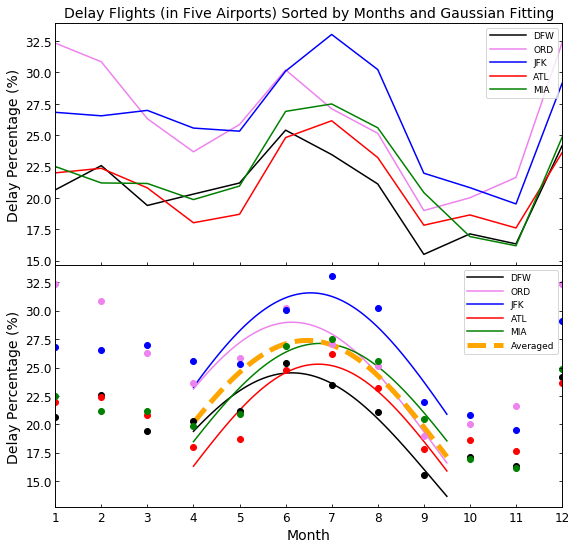

In [8]:
fig2 = plt.figure(figsize=(8,8))

ax1 = fig2.add_subplot(211)


#print month_plot[3:8],delay_month[0][3:8]

ax1.plot(month_plot,delay_month[0],color='black')
ax1.plot(month_plot,delay_month[1],color='violet')
ax1.plot(month_plot,delay_month[2],color='blue')
ax1.plot(month_plot,delay_month[3],color='red')
ax1.plot(month_plot,delay_month[4],color='green')
ax1.legend(['DFW','ORD','JFK','ATL','MIA'], fontsize=9,handlelength=4,frameon=True,loc='upper right')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
#ax1.set_xlabel('Month',fontsize=12)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.xaxis.set_ticks(np.arange(1,13,1))
ax1.set_xlim([1,12])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.title('Delay Flights (in Five Airports) Sorted by Months and Gaussian Fitting',fontsize=14)
plt.setp(ax1.get_xticklabels(),visible=False)


plt.subplots_adjust(hspace=0)

ax2 = fig2.add_subplot(212)

X0 = month_plot[3:9]
X1 = month_plot[3:9]
X2 = month_plot[3:9]
X3 = month_plot[3:9]
X4 = month_plot[3:9]

#print(X0)



data0 = delay_month[0][3:9]
data1 = delay_month[1][3:9]
data2 = delay_month[2][3:9]
data3 = delay_month[3][3:9]
data4 = delay_month[4][3:9]

data_ave = (data0 + data1 + data2 + data3 + data4)/5

popt0, _ = optimize.curve_fit(gaussian, X0, data0)
popt1, _ = optimize.curve_fit(gaussian, X1, data1)
popt2, _ = optimize.curve_fit(gaussian, X2, data2)
popt3, _ = optimize.curve_fit(gaussian, X3, data3)
popt4, _ = optimize.curve_fit(gaussian, X4, data4)
popt_ave, _ = optimize.curve_fit(gaussian, X4, data_ave)

X_smooth = np.linspace(4, 9.5, 100)
ax2.plot(X_smooth,gaussian(X_smooth, *popt0),color='black')
ax2.plot(X_smooth,gaussian(X_smooth, *popt1),color='violet')
ax2.plot(X_smooth,gaussian(X_smooth, *popt2),color='blue')
ax2.plot(X_smooth,gaussian(X_smooth, *popt3),color='red')
ax2.plot(X_smooth,gaussian(X_smooth, *popt4),color='green')
ax2.plot(X_smooth,gaussian(X_smooth, *popt_ave),'r--',color='orange',linewidth=5)

ax2.plot(month_plot,delay_month[0],'o',color='black')
ax2.plot(month_plot,delay_month[1],'o',color='violet')
ax2.plot(month_plot,delay_month[2],'o',color='blue')
ax2.plot(month_plot,delay_month[3],'o',color='red')
ax2.plot(month_plot,delay_month[4],'o',color='green')
ax2.legend(['DFW','ORD','JFK','ATL','MIA','Averaged'], fontsize=9,handlelength=4,frameon=True,loc='upper right')
ax2.set_xlabel('Month',fontsize=14)
ax2.xaxis.set_ticks(np.arange(1,13,1))
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlim([1,12])
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig2.subplots_adjust(left=0.09,right=0.97,bottom=0.08,top=0.92)

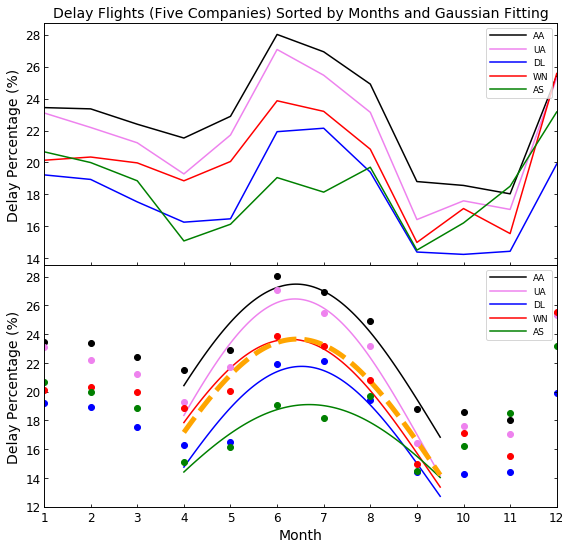

In [9]:
fig3 = plt.figure(figsize=(8,8))

ax1 = fig3.add_subplot(211)


ax1.plot(month_plot,delay_month2[0],color='black')
ax1.plot(month_plot,delay_month2[1],color='violet')
ax1.plot(month_plot,delay_month2[2],color='blue')
ax1.plot(month_plot,delay_month2[3],color='red')
ax1.plot(month_plot,delay_month2[4],color='green')
ax1.legend(['AA','UA','DL','WN','AS'], fontsize=9,handlelength=4,frameon=True,loc='upper right')
ax1.xaxis.set_tick_params(labelsize=12,direction='in')
ax1.yaxis.set_tick_params(labelsize=12,direction='in')
ax1.xaxis.set_ticks(np.arange(1,13,1))
#ax1.set_xlabel('Month',fontsize=12)
ax1.set_ylabel('Delay Percentage (%)',fontsize=14)
ax1.set_xlim([1,12])
ax11 = ax1.twinx()
ax11.set_ylim(ax1.get_ylim())
ax11.get_yaxis().set_tick_params(direction='in',labelright='False')
plt.title('Delay Flights (Five Companies) Sorted by Months and Gaussian Fitting',fontsize=14)
plt.setp(ax1.get_xticklabels(),visible=False)



plt.subplots_adjust(hspace=0)

ax2 = fig3.add_subplot(212)

X0 = month_plot[3:9]
X1 = month_plot[3:9]
X2 = month_plot[3:9]
X3 = month_plot[3:9]
X4 = month_plot[3:9]

#print(X0)



data0 = delay_month2[0][3:9]
data1 = delay_month2[1][3:9]
data2 = delay_month2[2][3:9]
data3 = delay_month2[3][3:9]
data4 = delay_month2[4][3:9]

data_ave = (data0 + data1 + data2 + data3 + data4)/5

popt0, _ = optimize.curve_fit(gaussian, X0, data0)
popt1, _ = optimize.curve_fit(gaussian, X1, data1)
popt2, _ = optimize.curve_fit(gaussian, X2, data2)
popt3, _ = optimize.curve_fit(gaussian, X3, data3)
popt4, _ = optimize.curve_fit(gaussian, X4, data4)
popt_ave, _ = optimize.curve_fit(gaussian, X4, data_ave)

X_smooth = np.linspace(4, 9.5, 100)
ax2.plot(X_smooth,gaussian(X_smooth, *popt0),color='black')
ax2.plot(X_smooth,gaussian(X_smooth, *popt1),color='violet')
ax2.plot(X_smooth,gaussian(X_smooth, *popt2),color='blue')
ax2.plot(X_smooth,gaussian(X_smooth, *popt3),color='red')
ax2.plot(X_smooth,gaussian(X_smooth, *popt4),color='green')
ax2.plot(X_smooth,gaussian(X_smooth, *popt_ave),'r--',color='orange',linewidth=5)

ax2.plot(month_plot,delay_month2[0],'o',color='black')
ax2.plot(month_plot,delay_month2[1],'o',color='violet')
ax2.plot(month_plot,delay_month2[2],'o',color='blue')
ax2.plot(month_plot,delay_month2[3],'o',color='red')
ax2.plot(month_plot,delay_month2[4],'o',color='green')
ax2.legend(['AA','UA','DL','WN','AS'], fontsize=9,handlelength=4,frameon=True,loc='upper right')
ax2.set_xlabel('Month',fontsize=14)
ax2.set_ylabel('Delay Percentage (%)',fontsize=14)
ax2.xaxis.set_tick_params(labelsize=12,direction='in')
ax2.yaxis.set_tick_params(labelsize=12,direction='in')
ax2.set_xlim([1,12])
ax2.xaxis.set_ticks(np.arange(1,13,1))
ax21 = ax2.twinx()
ax21.set_ylim(ax2.get_ylim())
ax21.get_yaxis().set_tick_params(direction='in',labelright='False')

fig3.subplots_adjust(left=0.08,right=0.97,bottom=0.08,top=0.92)